In [47]:
import pandas as pd   #reading the dataset
mercedez_df=pd.read_csv('Mercedez.csv')
mercedez_df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [48]:
output=mercedez_df['y']
output

mercedez_df.drop(columns='y',inplace=True)

In [49]:
mercedez_df.isnull().sum() #finding missing values
mercedez_df.dtypes

ID       int64
X0      object
X1      object
X2      object
X3      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 377, dtype: object

In [50]:
mercedez_df.drop(columns='ID',inplace=True)

In [51]:
identical_cols=[]
for col in mercedez_df.columns:
    if mercedez_df[col].nunique()==1 or mercedez_df[col].nunique==mercedez_df.shape[0]:
        identical_cols.append(col)
identical_cols
mercedez_df.drop(columns=identical_cols,inplace=True)
    
mercedez_df

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,h,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,e,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,u,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
con_cols=[col for col in mercedez_df if mercedez_df[col].dtype=='int64'or mercedez_df[col].dtype=='float64']

In [53]:
cat_cols=[col for col in mercedez_df if mercedez_df[col].dtype=='object']
cat_cols

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(mercedez_df,output,test_size=0.2,random_state=45)

In [55]:
one_hot_train=pd.get_dummies(X_train[cat_cols])
one_hot_test=pd.get_dummies(X_test[cat_cols])

In [56]:
X_train_final,X_test_final=one_hot_train.align(one_hot_test,join='inner',axis=1,fill_value=0)
train_df=pd.concat([X_train[con_cols],X_train_final],axis=1)

In [57]:

test_df=pd.concat([X_test[con_cols],X_test_final],axis=1)
test_df

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
2226,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1101,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2897,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
978,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3563,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3952,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2868,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


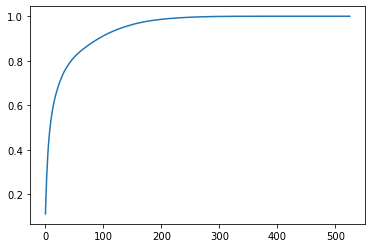

In [58]:
import numpy as np        #PCA:principal component analysis 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca=PCA()
X_train_pca_df=pd.DataFrame(pca.fit_transform(train_df))
X_train_pca_df
plt.plot(np.cumsum(pca.explained_variance_ratio_))


In [59]:
pca.explained_variance_
pca_1=PCA(n_components=70)
X_train_pca_df=pd.DataFrame(pca_1.fit_transform(train_df),columns=list(range(0,70)))
X_test_pca_df=pd.DataFrame(pca_1.transform(test_df))
         


In [60]:
#pca may lead to no multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df=pd.DataFrame({'Vif_Factor_pca':[variance_inflation_factor(X_train_pca_df.values,i) for i in range(X_train_pca_df.shape[1]) ],
        'Column_name':X_train_pca_df.columns})
vif_df

,Vif_Factor_pca,Column_name
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
...,...,...
65,1.0,65
66,1.0,66
67,1.0,67
68,1.0,68


In [61]:
from sklearn.tree import DecisionTreeRegressor   #decision tree
regressor=DecisionTreeRegressor(max_depth=8)
regressor.fit(train_df,y_train)
pred_tree=regressor.predict(test_df)
pred_tree
regressor.get_depth()
regressor.get_n_leaves()
score_decision_tree_train=regressor.score(train_df,y_train)
score_decision_tree_test=regressor.score(test_df,y_test)
score_decision_tree_train,score_decision_tree_test


(0.626484260345493, 0.5414336859752162)

In [62]:
regressor=DecisionTreeRegressor(max_depth=8)  #decision tree for pca_df
regressor.fit(X_train_pca_df,y_train)
pred_tree=regressor.predict(X_test_pca_df)
pred_tree
regressor.get_depth()
regressor.get_n_leaves()
score_decision_tree_train=regressor.score(X_train_pca_df,y_train)
score_decision_tree_test=regressor.score(X_test_pca_df,y_test)
score_decision_tree_train,score_decision_tree_test


(0.6015956830706337, 0.3068812894702093)

In [63]:
from sklearn.linear_model import LinearRegression,Lasso   #Linear Regression
linreg=LinearRegression()
linreg.fit(train_df,y_train)
pred=linreg.predict(test_df)
print('train_score',linreg.score(train_df,y_train))
print('test_score',linreg.score(test_df,y_test))



train_score 0.6173718920985387
test_score -2.669657320950351e+22


In [64]:
linreg=LinearRegression()   #linear regression for pca_df
linreg.fit(X_train_pca_df,y_train)
pred=linreg.predict(X_test_pca_df)
print('train_score',linreg.score(X_train_pca_df,y_train))
print('test_score',linreg.score(X_test_pca_df,y_test))


train_score 0.5437286728453194
test_score 0.5550449866881231


In [65]:
from sklearn.ensemble import RandomForestRegressor    #random forest
no_of_trees=list(range(25,400,50))
r2_score=[]
for num in no_of_trees:
    for_reg=RandomForestRegressor(n_estimators=num)
    for_reg.fit(train_df,y_train)
    r2_score.append(for_reg.score(train_df,y_train))

In [66]:
from sklearn.model_selection import GridSearchCV    #random forest hypertuning
param_dict= {'n_estimators':no_of_trees, 
             'max_depth':[4,6,8,10],
            'min_samples_split':[6,7,8,9]}
gdcv1=GridSearchCV(for_reg,param_grid=param_dict,cv=3,verbose=3)
gdcv1.fit(train_df,y_train)
gdcv1.predict(test_df)

Fitting 3 folds for each of 128 candidates, totalling 384 fits
[CV] max_depth=4, min_samples_split=6, n_estimators=25 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_split=6, n_estimators=25, score=0.602, total=   1.0s
[CV] max_depth=4, min_samples_split=6, n_estimators=25 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=4, min_samples_split=6, n_estimators=25, score=0.585, total=   0.9s
[CV] max_depth=4, min_samples_split=6, n_estimators=25 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]  max_depth=4, min_samples_split=6, n_estimators=25, score=0.450, total=   0.9s
[CV] max_depth=4, min_samples_split=6, n_estimators=75 ...............
[CV]  max_depth=4, min_samples_split=6, n_estimators=75, score=0.604, total=   2.6s
[CV] max_depth=4, min_samples_split=6, n_estimators=75 ...............
[CV]  max_depth=4, min_samples_split=6, n_estimators=75, score=0.584, total=   2.6s
[CV] max_depth=4, min_samples_split=6, n_estimators=75 ...............
[CV]  max_depth=4, min_samples_split=6, n_estimators=75, score=0.447, total=   2.8s
[CV] max_depth=4, min_samples_split=6, n_estimators=125 ..............
[CV]  max_depth=4, min_samples_split=6, n_estimators=125, score=0.608, total=   4.9s
[CV] max_depth=4, min_samples_split=6, n_estimators=125 ..............
[CV]  max_depth=4, min_samples_split=6, n_estimators=125, score=0.586, total=   4.6s
[CV] max_depth=4, min_samples_split=6, n_estimators=125 ..............
[CV]  max_depth=4, min_samples_split=6, n_estimators=125, score=0.44

[CV]  max_depth=4, min_samples_split=8, n_estimators=125, score=0.586, total=   4.3s
[CV] max_depth=4, min_samples_split=8, n_estimators=125 ..............
[CV]  max_depth=4, min_samples_split=8, n_estimators=125, score=0.447, total=   4.4s
[CV] max_depth=4, min_samples_split=8, n_estimators=175 ..............
[CV]  max_depth=4, min_samples_split=8, n_estimators=175, score=0.604, total=   6.4s
[CV] max_depth=4, min_samples_split=8, n_estimators=175 ..............
[CV]  max_depth=4, min_samples_split=8, n_estimators=175, score=0.586, total=   6.6s
[CV] max_depth=4, min_samples_split=8, n_estimators=175 ..............
[CV]  max_depth=4, min_samples_split=8, n_estimators=175, score=0.446, total=   6.5s
[CV] max_depth=4, min_samples_split=8, n_estimators=225 ..............
[CV]  max_depth=4, min_samples_split=8, n_estimators=225, score=0.608, total=   8.0s
[CV] max_depth=4, min_samples_split=8, n_estimators=225 ..............
[CV]  max_depth=4, min_samples_split=8, n_estimators=225, score=

[CV]  max_depth=6, min_samples_split=6, n_estimators=225, score=0.591, total=  10.8s
[CV] max_depth=6, min_samples_split=6, n_estimators=225 ..............
[CV]  max_depth=6, min_samples_split=6, n_estimators=225, score=0.585, total=  10.7s
[CV] max_depth=6, min_samples_split=6, n_estimators=225 ..............
[CV]  max_depth=6, min_samples_split=6, n_estimators=225, score=0.439, total=  10.8s
[CV] max_depth=6, min_samples_split=6, n_estimators=275 ..............
[CV]  max_depth=6, min_samples_split=6, n_estimators=275, score=0.587, total=  14.2s
[CV] max_depth=6, min_samples_split=6, n_estimators=275 ..............
[CV]  max_depth=6, min_samples_split=6, n_estimators=275, score=0.584, total=  14.7s
[CV] max_depth=6, min_samples_split=6, n_estimators=275 ..............
[CV]  max_depth=6, min_samples_split=6, n_estimators=275, score=0.441, total=  13.5s
[CV] max_depth=6, min_samples_split=6, n_estimators=325 ..............
[CV]  max_depth=6, min_samples_split=6, n_estimators=325, score=

[CV]  max_depth=6, min_samples_split=8, n_estimators=275, score=0.441, total=  13.1s
[CV] max_depth=6, min_samples_split=8, n_estimators=325 ..............
[CV]  max_depth=6, min_samples_split=8, n_estimators=325, score=0.586, total=  15.8s
[CV] max_depth=6, min_samples_split=8, n_estimators=325 ..............
[CV]  max_depth=6, min_samples_split=8, n_estimators=325, score=0.585, total=  15.5s
[CV] max_depth=6, min_samples_split=8, n_estimators=325 ..............
[CV]  max_depth=6, min_samples_split=8, n_estimators=325, score=0.441, total=  15.4s
[CV] max_depth=6, min_samples_split=8, n_estimators=375 ..............
[CV]  max_depth=6, min_samples_split=8, n_estimators=375, score=0.588, total=  17.7s
[CV] max_depth=6, min_samples_split=8, n_estimators=375 ..............
[CV]  max_depth=6, min_samples_split=8, n_estimators=375, score=0.584, total=  17.8s
[CV] max_depth=6, min_samples_split=8, n_estimators=375 ..............
[CV]  max_depth=6, min_samples_split=8, n_estimators=375, score=

[CV]  max_depth=8, min_samples_split=6, n_estimators=375, score=0.581, total=  22.7s
[CV] max_depth=8, min_samples_split=6, n_estimators=375 ..............
[CV]  max_depth=8, min_samples_split=6, n_estimators=375, score=0.436, total=  22.6s
[CV] max_depth=8, min_samples_split=7, n_estimators=25 ...............
[CV]  max_depth=8, min_samples_split=7, n_estimators=25, score=0.554, total=   1.5s
[CV] max_depth=8, min_samples_split=7, n_estimators=25 ...............
[CV]  max_depth=8, min_samples_split=7, n_estimators=25, score=0.576, total=   1.5s
[CV] max_depth=8, min_samples_split=7, n_estimators=25 ...............
[CV]  max_depth=8, min_samples_split=7, n_estimators=25, score=0.437, total=   1.6s
[CV] max_depth=8, min_samples_split=7, n_estimators=75 ...............
[CV]  max_depth=8, min_samples_split=7, n_estimators=75, score=0.572, total=   4.6s
[CV] max_depth=8, min_samples_split=7, n_estimators=75 ...............
[CV]  max_depth=8, min_samples_split=7, n_estimators=75, score=0.580

[CV]  max_depth=8, min_samples_split=9, n_estimators=75, score=0.571, total=   4.7s
[CV] max_depth=8, min_samples_split=9, n_estimators=75 ...............
[CV]  max_depth=8, min_samples_split=9, n_estimators=75, score=0.584, total=   4.7s
[CV] max_depth=8, min_samples_split=9, n_estimators=75 ...............
[CV]  max_depth=8, min_samples_split=9, n_estimators=75, score=0.437, total=   4.6s
[CV] max_depth=8, min_samples_split=9, n_estimators=125 ..............
[CV]  max_depth=8, min_samples_split=9, n_estimators=125, score=0.574, total=   7.7s
[CV] max_depth=8, min_samples_split=9, n_estimators=125 ..............
[CV]  max_depth=8, min_samples_split=9, n_estimators=125, score=0.581, total=   7.8s
[CV] max_depth=8, min_samples_split=9, n_estimators=125 ..............
[CV]  max_depth=8, min_samples_split=9, n_estimators=125, score=0.438, total=   7.6s
[CV] max_depth=8, min_samples_split=9, n_estimators=175 ..............
[CV]  max_depth=8, min_samples_split=9, n_estimators=175, score=0.5

[CV]  max_depth=10, min_samples_split=7, n_estimators=125, score=0.430, total=  10.3s
[CV] max_depth=10, min_samples_split=7, n_estimators=175 .............
[CV]  max_depth=10, min_samples_split=7, n_estimators=175, score=0.568, total=  13.3s
[CV] max_depth=10, min_samples_split=7, n_estimators=175 .............
[CV]  max_depth=10, min_samples_split=7, n_estimators=175, score=0.578, total=  13.3s
[CV] max_depth=10, min_samples_split=7, n_estimators=175 .............
[CV]  max_depth=10, min_samples_split=7, n_estimators=175, score=0.432, total=  13.1s
[CV] max_depth=10, min_samples_split=7, n_estimators=225 .............
[CV]  max_depth=10, min_samples_split=7, n_estimators=225, score=0.562, total=  16.6s
[CV] max_depth=10, min_samples_split=7, n_estimators=225 .............
[CV]  max_depth=10, min_samples_split=7, n_estimators=225, score=0.579, total=  17.2s
[CV] max_depth=10, min_samples_split=7, n_estimators=225 .............
[CV]  max_depth=10, min_samples_split=7, n_estimators=225,

[CV]  max_depth=10, min_samples_split=9, n_estimators=225, score=0.577, total=  17.5s
[CV] max_depth=10, min_samples_split=9, n_estimators=225 .............
[CV]  max_depth=10, min_samples_split=9, n_estimators=225, score=0.431, total=  17.8s
[CV] max_depth=10, min_samples_split=9, n_estimators=275 .............
[CV]  max_depth=10, min_samples_split=9, n_estimators=275, score=0.567, total=  20.8s
[CV] max_depth=10, min_samples_split=9, n_estimators=275 .............
[CV]  max_depth=10, min_samples_split=9, n_estimators=275, score=0.578, total=  21.8s
[CV] max_depth=10, min_samples_split=9, n_estimators=275 .............
[CV]  max_depth=10, min_samples_split=9, n_estimators=275, score=0.427, total=  23.4s
[CV] max_depth=10, min_samples_split=9, n_estimators=325 .............
[CV]  max_depth=10, min_samples_split=9, n_estimators=325, score=0.564, total=  25.5s
[CV] max_depth=10, min_samples_split=9, n_estimators=325 .............
[CV]  max_depth=10, min_samples_split=9, n_estimators=325,

[Parallel(n_jobs=1)]: Done 384 out of 384 | elapsed: 73.1min finished


array([ 93.95663163,  93.95663163,  93.95663163, 112.8380092 ,
       106.11504093, 103.14879528,  93.95663163, 103.47455623,
       112.54410956, 112.92690588, 112.74723007, 103.35792272,
       103.14879528,  93.95663163,  94.05930417,  93.95663163,
        93.95663163, 114.57566877,  93.95663163,  93.95663163,
       112.8380092 ,  94.14246587,  94.05930417,  94.05930417,
        94.05930417, 112.65029103,  93.95663163, 113.15464132,
       112.54593096,  94.29713823,  77.60289644,  93.95663163,
        93.95663163, 112.85159014, 113.55420461,  93.95663163,
       104.57645225, 112.73150429,  93.95663163,  93.95663163,
       102.91893564, 112.34840684, 112.64532127,  93.95663163,
        93.95663163,  94.05930417,  93.95663163,  93.95663163,
        93.95663163, 112.54593096,  93.95663163,  93.95663163,
        93.95663163,  93.95663163,  93.95663163,  93.95663163,
       113.87725173, 104.46552696,  93.95663163,  94.05930417,
       112.54593096,  93.95663163, 103.07248467,  94.05

In [67]:
from sklearn.ensemble import AdaBoostRegressor   #Adaboost
adaboost=AdaBoostRegressor()
param_dict1={'n_estimators':no_of_trees,
             'learning_rate':[0.001,0.01,0.1,1]
            }
gdcv=GridSearchCV(adaboost,param_grid=param_dict1,cv=3,verbose=3)
gdcv.fit(train_df,y_train)
             
             
             


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] learning_rate=0.001, n_estimators=25 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.001, n_estimators=25, score=0.627, total=   2.5s
[CV] learning_rate=0.001, n_estimators=25 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  learning_rate=0.001, n_estimators=25, score=0.588, total=   2.5s
[CV] learning_rate=0.001, n_estimators=25 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


[CV]  learning_rate=0.001, n_estimators=25, score=0.457, total=   2.3s
[CV] learning_rate=0.001, n_estimators=75 ............................
[CV]  learning_rate=0.001, n_estimators=75, score=0.632, total=   7.1s
[CV] learning_rate=0.001, n_estimators=75 ............................
[CV]  learning_rate=0.001, n_estimators=75, score=0.589, total=   8.3s
[CV] learning_rate=0.001, n_estimators=75 ............................
[CV]  learning_rate=0.001, n_estimators=75, score=0.457, total=   7.3s
[CV] learning_rate=0.001, n_estimators=125 ...........................
[CV]  learning_rate=0.001, n_estimators=125, score=0.635, total=  11.0s
[CV] learning_rate=0.001, n_estimators=125 ...........................
[CV]  learning_rate=0.001, n_estimators=125, score=0.589, total=  11.0s
[CV] learning_rate=0.001, n_estimators=125 ...........................
[CV]  learning_rate=0.001, n_estimators=125, score=0.458, total=  11.6s
[CV] learning_rate=0.001, n_estimators=175 ...........................
[CV

[CV]  learning_rate=0.1, n_estimators=225, score=-0.163, total=  18.3s
[CV] learning_rate=0.1, n_estimators=225 .............................
[CV] . learning_rate=0.1, n_estimators=225, score=0.300, total=  16.2s
[CV] learning_rate=0.1, n_estimators=225 .............................
[CV] . learning_rate=0.1, n_estimators=225, score=0.368, total=   8.3s
[CV] learning_rate=0.1, n_estimators=275 .............................
[CV]  learning_rate=0.1, n_estimators=275, score=-0.066, total=  16.1s
[CV] learning_rate=0.1, n_estimators=275 .............................
[CV] . learning_rate=0.1, n_estimators=275, score=0.112, total=  22.0s
[CV] learning_rate=0.1, n_estimators=275 .............................
[CV] . learning_rate=0.1, n_estimators=275, score=0.325, total=   9.9s
[CV] learning_rate=0.1, n_estimators=325 .............................
[CV] . learning_rate=0.1, n_estimators=325, score=0.353, total=  10.2s
[CV] learning_rate=0.1, n_estimators=325 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed: 18.9min finished


GridSearchCV(cv=3, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [25, 75, 125, 175, 225, 275, 325,
                                          375]},
             verbose=3)